In [1]:
import csv
import dateutil.parser
import time
from collections import Counter
import numpy as np
import gc

start = time.time()

file_path = 'NYPD_Motor_Vehicle_Collisions.csv'
#def read_data_file(file_path):
infile = open(file_path, 'r')    # open the file for reading
reader = csv.DictReader(infile, delimiter=',', skipinitialspace=True)

data_csv = {}#dictionary of arrays
# read through the CSV one line at a time
evals = ['LOCATION',
        'LATITUDE',
        'LONGITUDE',
        'NUMBER OF CYCLIST INJURED',
        'NUMBER OF CYCLIST KILLED',
        'NUMBER OF MOTORIST INJURED',
        'NUMBER OF MOTORIST KILLED',
        'NUMBER OF PEDESTRIANS INJURED',
        'NUMBER OF PEDESTRIANS KILLED',
        'NUMBER OF PERSONS INJURED',
        'NUMBER OF PERSONS KILLED']
for i,line in enumerate(reader):
    # assign the various fields in the line to variables
    line['DATE'] = dateutil.parser.parse(line['DATE']+' '+line['TIME'])
    line.pop('TIME')
    for col in line.keys():
        if col in evals:
            line[col] = eval(line[col]) if line[col] != '' else None
        if col not in data_csv.keys():
            data_csv[col] = []
        data_csv[col].append(line[col])

for x in data_csv.keys():
    data_csv[x] = np.array(data_csv[x])
end = time.time()
print "time spent: %d seg"%(end - start)#150Seg
print "%d rows loaded"%len(data_csv['DATE'])
#return data_csv
gc.collect()

time spent: 143 seg
769054 rows loaded


0

The data is 142MB in size, has 28 columns and 769054 rows.

In [2]:
test = dict([(k,i[0]) for k,i in data_csv.iteritems()])
test

{'BOROUGH': 'MANHATTAN',
 'CONTRIBUTING FACTOR VEHICLE 1': 'Unspecified',
 'CONTRIBUTING FACTOR VEHICLE 2': 'Unspecified',
 'CONTRIBUTING FACTOR VEHICLE 3': '',
 'CONTRIBUTING FACTOR VEHICLE 4': '',
 'CONTRIBUTING FACTOR VEHICLE 5': '',
 'CROSS STREET NAME': 'MADISON AVENUE',
 'DATE': datetime.datetime(2016, 3, 14, 0, 45),
 'LATITUDE': 40.8082795,
 'LOCATION': (40.8082795, -73.9387929),
 'LONGITUDE': -73.9387929,
 'NUMBER OF CYCLIST INJURED': 0,
 'NUMBER OF CYCLIST KILLED': 0,
 'NUMBER OF MOTORIST INJURED': 0,
 'NUMBER OF MOTORIST KILLED': 0,
 'NUMBER OF PEDESTRIANS INJURED': 0,
 'NUMBER OF PEDESTRIANS KILLED': 0,
 'NUMBER OF PERSONS INJURED': 0,
 'NUMBER OF PERSONS KILLED': 0,
 'OFF STREET NAME': '',
 'ON STREET NAME': 'EAST 129 STREET',
 'UNIQUE KEY': '3405059',
 'VEHICLE TYPE CODE 1': 'PASSENGER VEHICLE',
 'VEHICLE TYPE CODE 2': 'PASSENGER VEHICLE',
 'VEHICLE TYPE CODE 3': '',
 'VEHICLE TYPE CODE 4': '',
 'VEHICLE TYPE CODE 5': '',
 'ZIP CODE': '10035'}

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

evals = ['LOCATION',
        'LATITUDE',
        'LONGITUDE',
        'NUMBER OF CYCLIST INJURED',
        'NUMBER OF CYCLIST KILLED',
        'NUMBER OF MOTORIST INJURED',
        'NUMBER OF MOTORIST KILLED',
        'NUMBER OF PEDESTRIANS INJURED',
        'NUMBER OF PEDESTRIANS KILLED',
        'NUMBER OF PERSONS INJURED',
        'NUMBER OF PERSONS KILLED']
hist = {}
for k,arr in data_csv.iteritems():
    print k
    print "\ttype: "+(type(data_csv[k][0])).__name__
    if k in evals:
        print '\tmin: '+str(arr.min())
        print '\tmax: '+str(arr.max())
    
    hist[k] = Counter(arr)

NUMBER OF CYCLIST KILLED
	type: int32
	min: 0
	max: 1
CONTRIBUTING FACTOR VEHICLE 1
	type: string_
CONTRIBUTING FACTOR VEHICLE 2
	type: string_
CONTRIBUTING FACTOR VEHICLE 3
	type: string_
CONTRIBUTING FACTOR VEHICLE 4
	type: string_
CONTRIBUTING FACTOR VEHICLE 5
	type: string_
ZIP CODE
	type: string_
DATE
	type: datetime
OFF STREET NAME
	type: string_
NUMBER OF MOTORIST KILLED
	type: int32
	min: 0
	max: 5
LOCATION
	type: tuple
	min: None
	max: (40.9128276, -73.9025057)
ON STREET NAME
	type: string_
UNIQUE KEY
	type: string_
CROSS STREET NAME
	type: string_
NUMBER OF MOTORIST INJURED
	type: int32
	min: 0
	max: 43
LONGITUDE
	type: float
	min: None
	max: -73.7005968
NUMBER OF PEDESTRIANS INJURED
	type: int32
	min: 0
	max: 15
NUMBER OF PEDESTRIANS KILLED
	type: int32
	min: 0
	max: 2
VEHICLE TYPE CODE 4
	type: string_
VEHICLE TYPE CODE 5
	type: string_
VEHICLE TYPE CODE 1
	type: string_
VEHICLE TYPE CODE 2
	type: string_
NUMBER OF PERSONS KILLED
	type: int32
	min: 0
	max: 5
VEHICLE TYPE CO

NUMBER OF CYCLIST KILLED


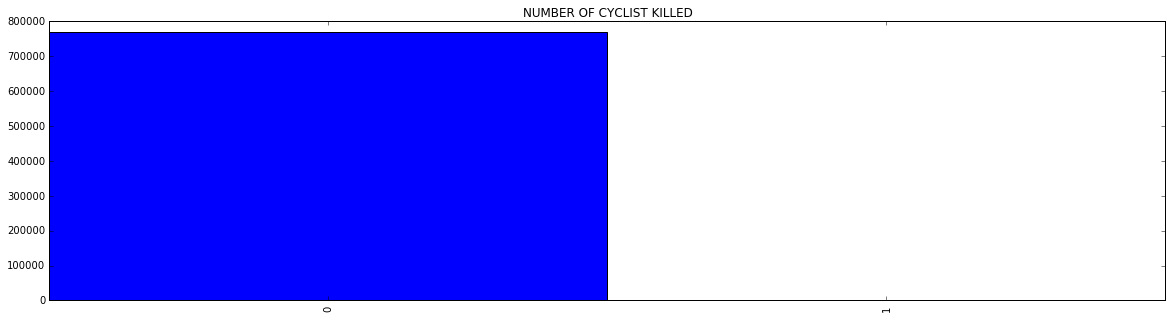

CONTRIBUTING FACTOR VEHICLE 1


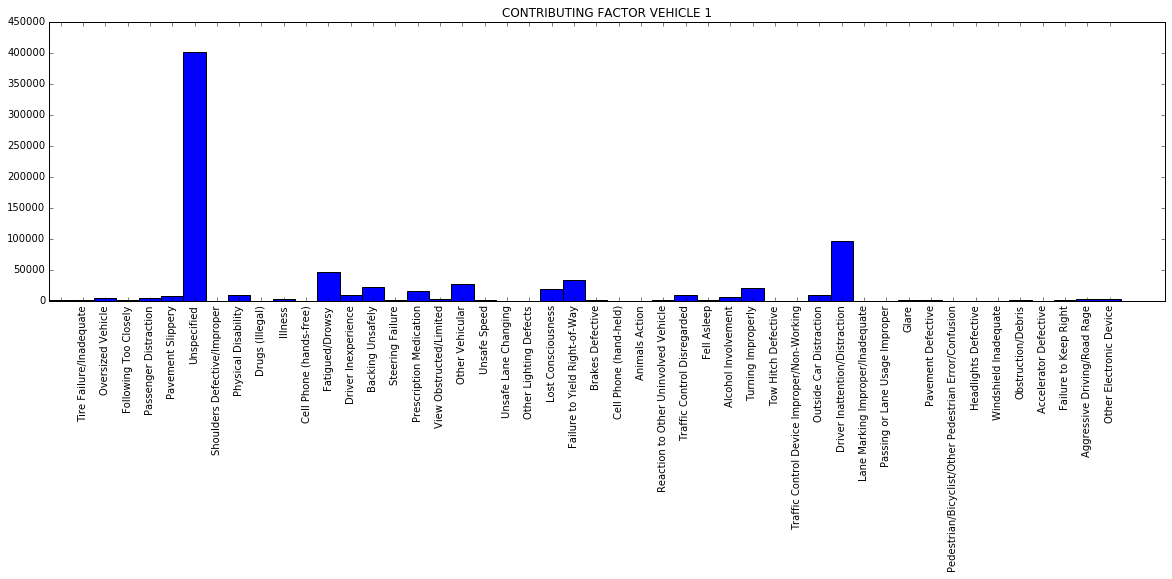

CONTRIBUTING FACTOR VEHICLE 2


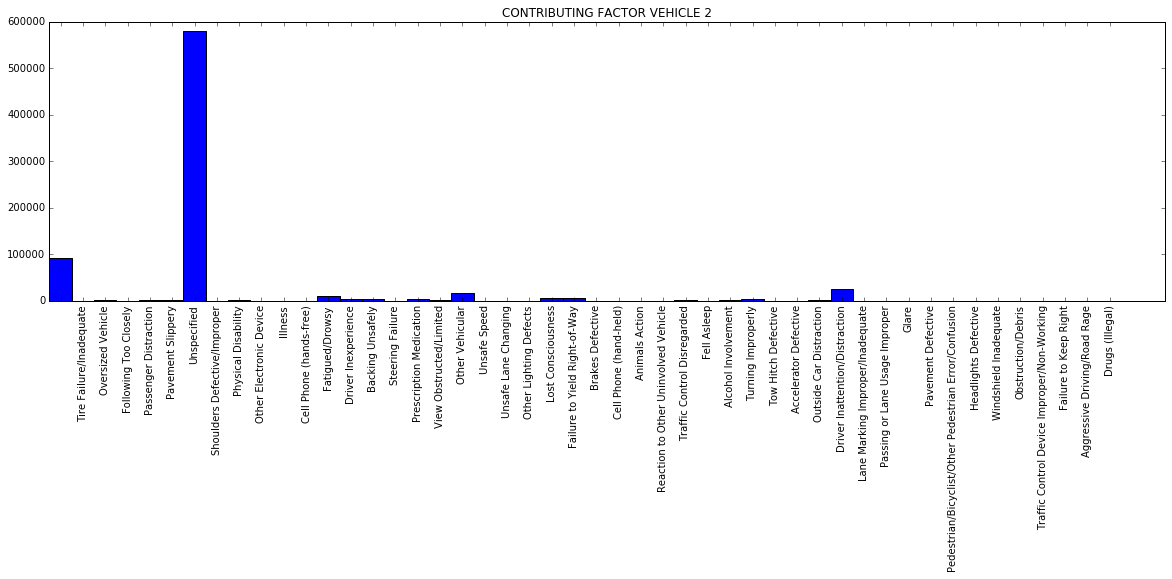

CONTRIBUTING FACTOR VEHICLE 3


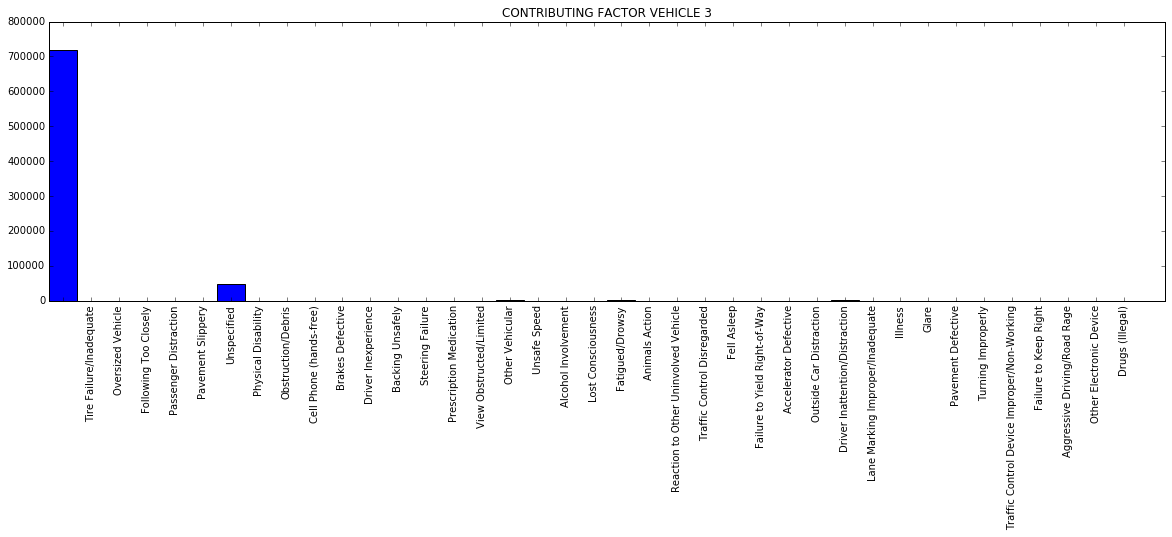

CONTRIBUTING FACTOR VEHICLE 4


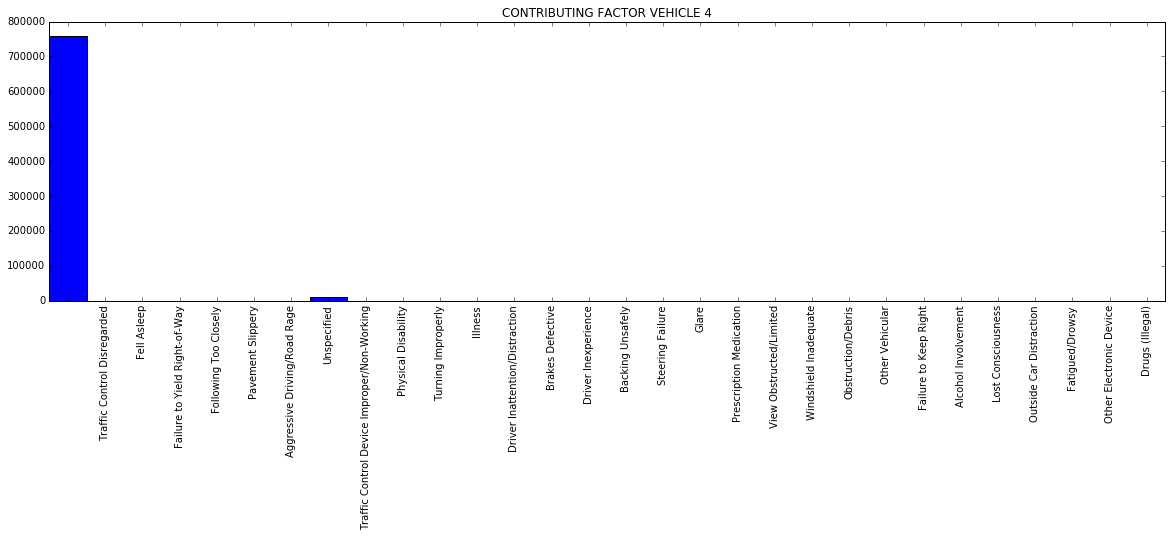

CONTRIBUTING FACTOR VEHICLE 5


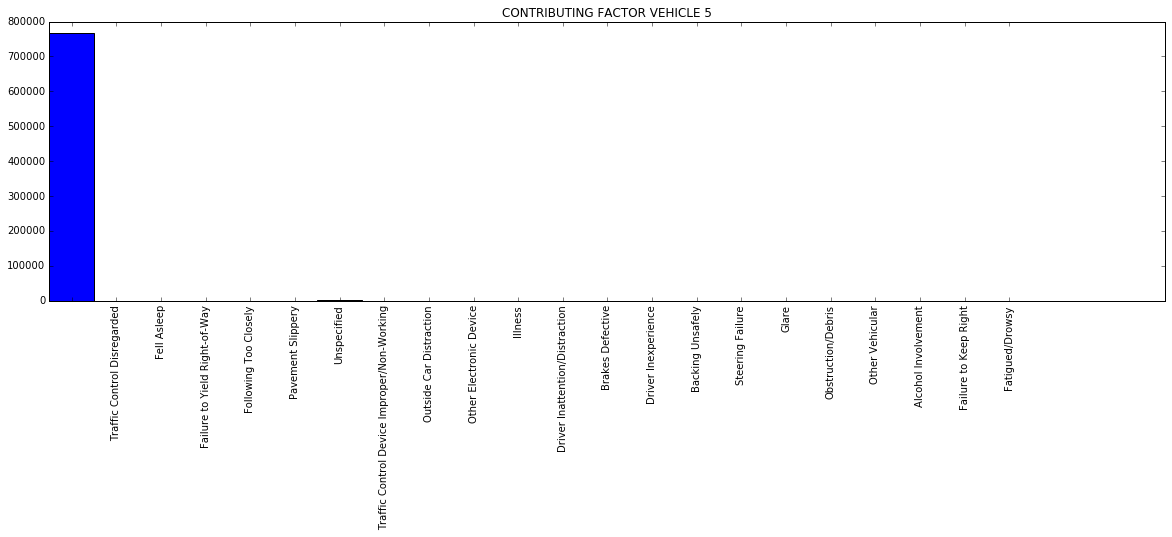

ZIP CODE


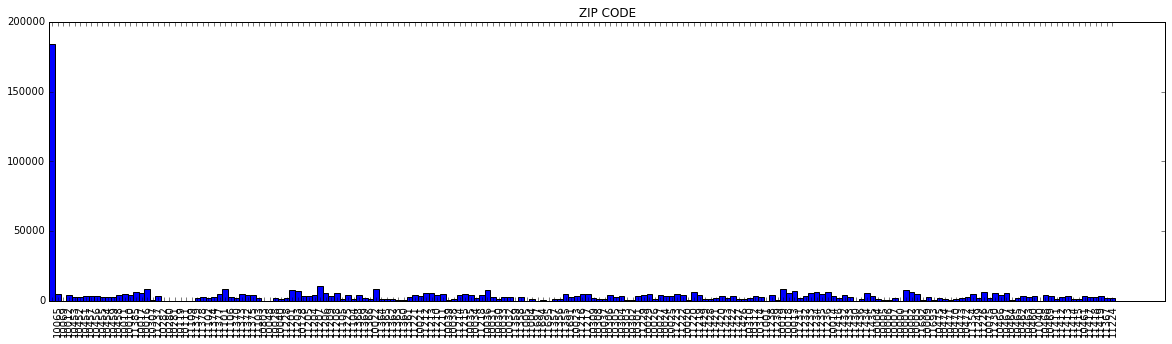

In [ ]:
for k,arr in hist.iteritems():
    print k
    labels, values = zip(*Counter(arr).items())

    indexes = np.arange(len(labels))
    width = 1
    
    plt.gcf().set_size_inches(20, 5)
    plt.bar(indexes, values, width)
    plt.xticks(indexes + width * 0.5, labels,rotation=90)
    plt.title(k)
    plt.show()